In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.optimize as sco

import hx_hydraulic as hxhy

In [2]:
df = pd.read_csv(r'C:\Users\valen\Downloads\PL_Maddalena.csv')

In [5]:
df.rename(columns={'x': 'Vdot', ' y': 'PL'}, inplace=True)
df.sort_values(by='Vdot', inplace=True)
df.reset_index(drop=True, inplace=True)

df['Vdot_m3s'] = df['Vdot']/3.6e6
A = (np.pi*0.0354**2)/4
df['V'] = df['Vdot_m3s']/A

In [6]:
df

,Vdot,PL,Vdot_m3s,V
0,1210.106486,2.766030,0.000336,0.341527
1,1542.553285,4.336081,0.000428,0.435353
2,1897.163205,6.803303,0.000527,0.535434
3,2251.773124,9.494818,0.000625,0.635515
4,2562.056804,12.186334,0.000712,0.723086
5,2916.666723,15.550728,0.000810,0.823167
6,3182.624163,18.690829,0.000884,0.898228
7,3470.744722,22.055223,0.000964,0.979544
8,3736.702162,25.643910,0.001038,1.054604
9,3980.496481,29.232597,0.001106,1.123410


In [13]:
bounds = ([0.],[np.inf])
def polyn2(q,b):
    return b*q**2
popt, pcov = sco.curve_fit(polyn2, df['V'], df['PL'],bounds=bounds)

q_array = np.arange(0,3,0.05)
dfe = pd.DataFrame()
dfe['V'] = q_array
dfe['PL'] = polyn2(q_array,*popt)

In [9]:
popt

array([23.12814137])

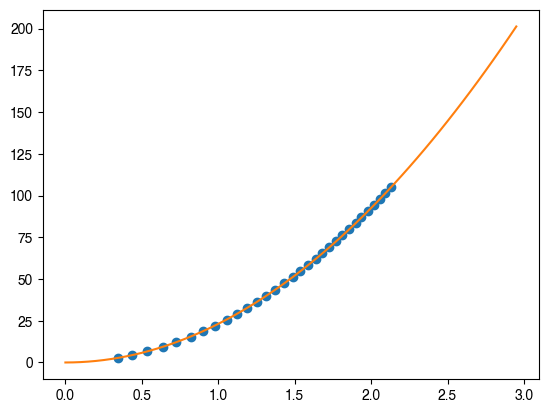

In [14]:
plt.plot(df['V'],df['PL'],'o')
plt.plot(dfe['V'],dfe['PL'])

In [18]:
(23*(0.07)**2)*1000

112.70000000000002

In [ ]:
df

In [ ]:
dfe

In [ ]:
popt

In [ ]:
# D_poss = np.arange(0.0129,0.0135,0.0001)

# for D in D_poss:
#     print(D)
#     duct = hxhy.duct(shape='tubular',D=D,L=0.130,k=1e-3)    
#     df['PL_Di='+str(round(D*1000,2))+'mm'] = df['Vdot'].apply(lambda x : duct.regular_PL(x,fluid_dict={'name':'MPG','glycol_rate':0.4}, p=1e5, T=293.15))

In [ ]:
def diff_D(D):
    duct = hxhy.duct(shape='tubular',D=D,L=0.130,k=1e-3)
    df['PL_D'] = df['Vdot'].apply(lambda x : duct.regular_PL(x,fluid_dict={'name':'MPG','glycol_rate':0.4}, p=1e5, T=293.15))
    return np.sum((df['PL']-df['PL_D'])**2)

In [ ]:
def diff_L(L):
    duct = hxhy.duct(shape='tubular',D=0.0354,L=L,k=1e-3)
    df['PL_D'] = df['Vdot'].apply(lambda x : duct.regular_PL(x,fluid_dict={'name':'MPG','glycol_rate':0.4}, p=1e5, T=293.15))
    return np.sum((df['PL']-df['PL_D'])**2)

In [ ]:
D_min = sco.minimize(diff_D,0.013,method='Nelder-Mead')['x'][0]

In [ ]:
L_min = sco.minimize(diff_L, 0.5, method='Nelder-Mead')['x'][0]

In [ ]:
L_min

In [ ]:
duct = hxhy.duct(shape='tubular',D=D,L=0.130,k=1e-3)
df['PL_D'] = df['Vdot'].apply(lambda x : duct.regular_PL(x,fluid_dict={'name':'MPG','glycol_rate':0.4}, p=1e5, T=293.15))

In [ ]:
duct = hxhy.duct(shape='tubular',D=D_min,L=0.130,k=1e-3)
df['PL_D'] = df['Vdot'].apply(lambda x : duct.regular_PL(x,fluid_dict={'name':'MPG','glycol_rate':0.4}, p=1e5, T=293.15))

duct = hxhy.duct(shape='tubular',D=0.0354,L=L_min,k=1e-3)
df['PL_L'] = df['Vdot'].apply(lambda x : duct.regular_PL(x,fluid_dict={'name':'MPG','glycol_rate':0.4}, p=1e5, T=293.15))

In [ ]:
plt.plot(df['Vdot'],df['PL'],label='Data')
plt.plot(dfe['Vdot'],dfe['PL'])

plt.xlim(0,800)
plt.ylim(0,2)

In [ ]:
popt

In [ ]:
plt.plot(df['Vdot'],df['PL'],label='Polynomial fit')
plt.plot(df['Vdot'],df['PL_D'],label='D')
plt.plot(df['Vdot'],df['PL_L'],label='L')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(0,800)
plt.ylim(0,2)

In [ ]:
Di_DN20 = 0.020
Di_DN25 = 0.026
Di_DN32 = 0.033